In [1]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

from matplotlib import pyplot as plt

c:\program files\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_dataset = np.loadtxt("train_dataset.csv", delimiter=',')
test_dataset = np.loadtxt("test_dataset.csv", delimiter=',')

In [3]:
features_count = 2
X_train = train_dataset[:, :features_count]
y_train = train_dataset[:, features_count:]
X_test = test_dataset[:, :features_count]
y_test = test_dataset[:, features_count:]

In [4]:
def plot_history(history, metrics=['loss']):
    for metric in metrics:
        plt.plot(history.history[metric], label=metric)
        plt.ylabel(metric)
        plt.xlabel('epoch')
        plt.show()

In [5]:
def plot_decision_boundary(X, y, model):
    cmap = plt.get_cmap('Paired')

    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    x_span = np.linspace(xmin, xmax, 1000)
    y_span = np.linspace(ymin, ymax, 1000)
    xx, yy = np.meshgrid(x_span, y_span)

    labels = model.predict(np.c_[xx.ravel(), yy.ravel()], batch_size=10000)

    labels = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, labels > 0.5, cmap=cmap, alpha=0.5)

    ax.scatter(X[:,0], X[:,1], c=y.ravel(), cmap=cmap, lw=0)

    return fig, ax

### Linear

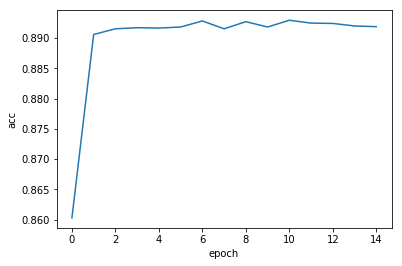

17000/17000 [==============================] - 1s 37us/step
Train Accuracy: 0.889
Test Accuracy: 0.892


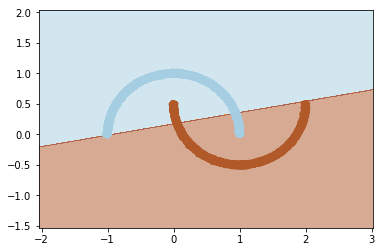

In [6]:
model = Sequential()
model.add(Dense(1, activation='sigmoid', input_dim=2))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, verbose=0)

plot_history(history, ['acc'])

train_accuracy = model.evaluate(X_test, y_test)[1]
test_accuracy = model.evaluate(X_train, y_train)[1]

print("Train Accuracy: %.3f" % train_accuracy)
print("Test Accuracy: %.3f" % test_accuracy)

plot_decision_boundary(X_train, y_train, model);

### Small hidden layer

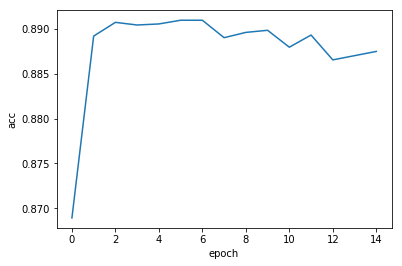

17000/17000 [==============================] - 1s 37us/step
Train Accuracy: 0.883
Test Accuracy: 0.885


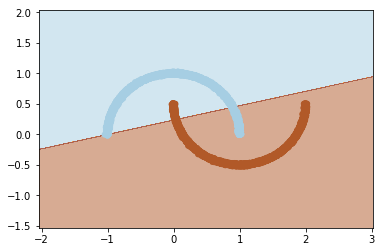

In [7]:
model = Sequential()
model.add(Dense(2, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(lr=0.5), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=15, verbose=0)

plot_history(history, ['acc'])

train_accuracy = model.evaluate(X_test, y_test)[1]
test_accuracy = model.evaluate(X_train, y_train)[1]

print("Train Accuracy: %.3f" % train_accuracy)
print("Test Accuracy: %.3f" % test_accuracy)

plot_decision_boundary(X_train, y_train, model);

### With recommendation from EasyNN

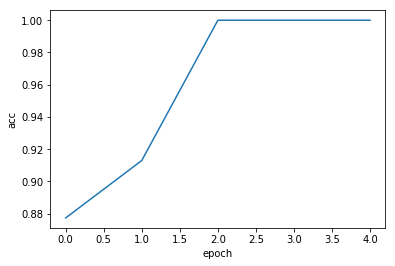

17000/17000 [==============================] - 1s 37us/step
Train Accuracy: 1.000
Test Accuracy: 1.000


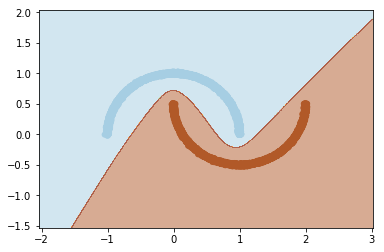

In [8]:
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_dim=2))
model.add(Dense(1, activation='sigmoid'))

model.compile(SGD(lr=0.7, decay=1e-6, momentum=0.8), 'binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=5, verbose=0)

plot_history(history, ['acc'])

train_accuracy = model.evaluate(X_test, y_test)[1]
test_accuracy = model.evaluate(X_train, y_train)[1]

print("Train Accuracy: %.3f" % train_accuracy)
print("Test Accuracy: %.3f" % test_accuracy)

plot_decision_boundary(X_train, y_train, model);